### Exploratory Data Analysis

In [26]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [27]:
import pandas as pd
data2=pd.read_csv('Cleaned_Bengaluru_House_Data.csv')

In [28]:
data2.shape

(5887, 9)

In [29]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       5887 non-null   object 
 1   availability    5887 non-null   object 
 2   location        5887 non-null   object 
 3   size(BHK)       5887 non-null   float64
 4   total_sqft      5887 non-null   float64
 5   bath            5887 non-null   float64
 6   balcony         5887 non-null   float64
 7   price           5887 non-null   float64
 8   price_per_sqft  5887 non-null   float64
dtypes: float64(6), object(3)
memory usage: 414.1+ KB


In [30]:
data2.head()

,area_type,availability,location,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,3.0,1875.0,3.0,1.0,167.0,8906.666667
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,2.0,1394.0,2.0,1.0,100.0,7173.601148
2,Super built-up Area,Under Construction,1st Phase JP Nagar,2.0,1077.0,2.0,2.0,93.0,8635.097493
3,Built-up Area,Ready To Move,1st Phase JP Nagar,1.0,1280.0,1.0,1.0,63.0,4921.875000
4,Built-up Area,Ready To Move,1st Phase JP Nagar,1.0,840.0,2.0,2.0,50.0,5952.380952


In [31]:
data2.describe()

,size(BHK),total_sqft,bath,balcony,price,price_per_sqft
count,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
mean,2.294887,1274.942063,2.204009,1.526754,71.980428,5501.041931
std,0.643068,366.998577,0.630786,0.762654,31.895318,1370.045686
min,1.000000,300.000000,1.000000,0.000000,10.000000,1900.000000
25%,2.000000,1060.000000,2.000000,1.000000,48.000000,4491.795527
50%,2.000000,1210.000000,2.000000,1.000000,67.000000,5500.000000
75%,3.000000,1500.000000,3.000000,2.000000,90.000000,6421.317404
max,4.000000,2423.000000,4.000000,3.000000,170.000000,9565.217391


In [32]:
#Check for missing data percentages.
missing_data = data2.isnull().mean() * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))


Series([], dtype: float64)


Numerical Features:
Index(['size(BHK)', 'total_sqft', 'bath', 'balcony', 'price',
       'price_per_sqft'],
      dtype='object')


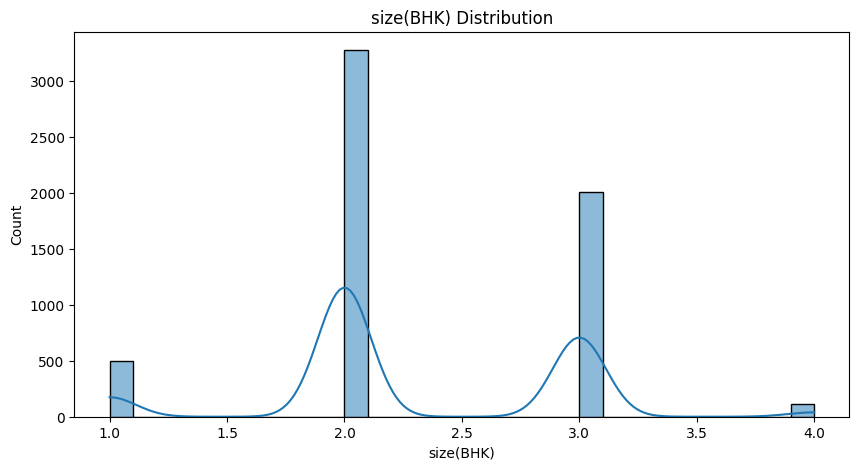

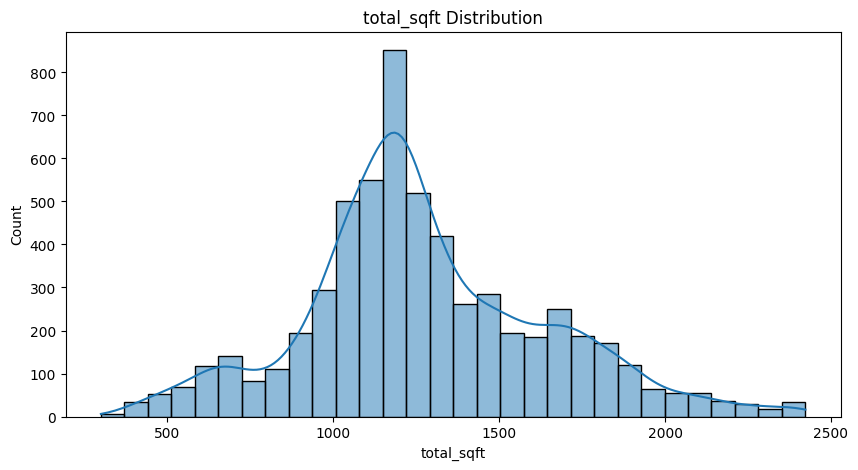

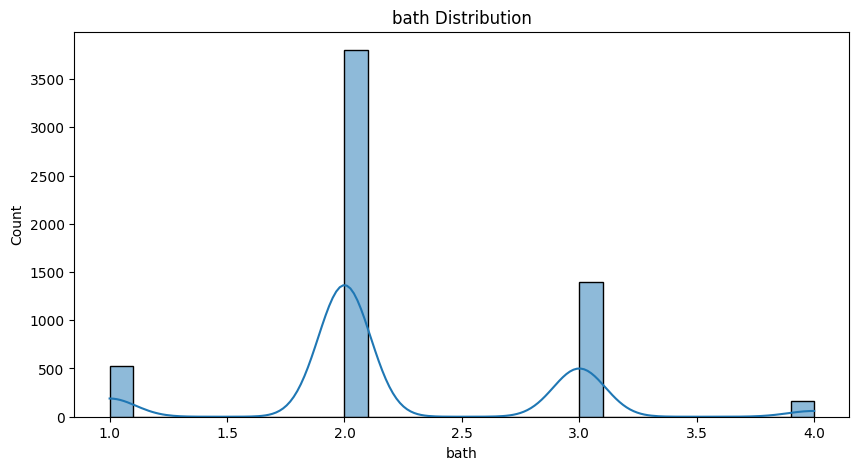

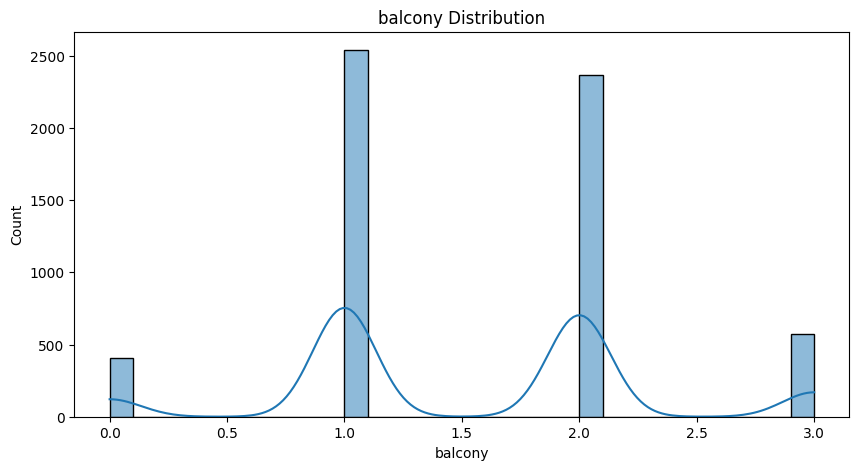

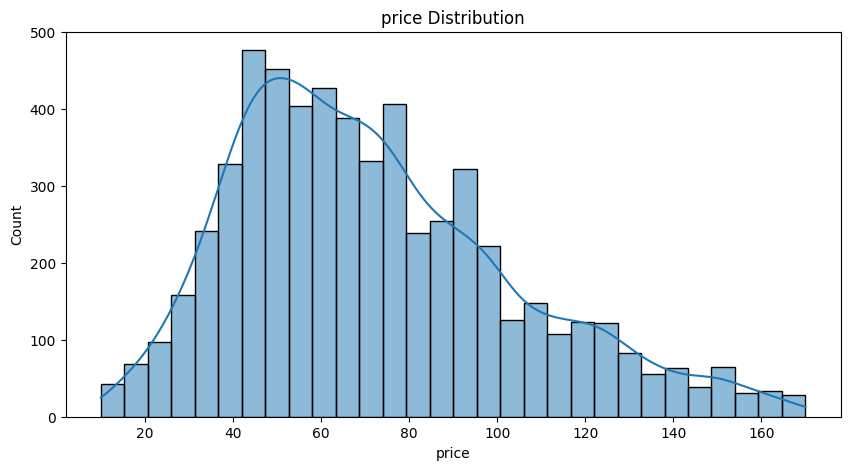

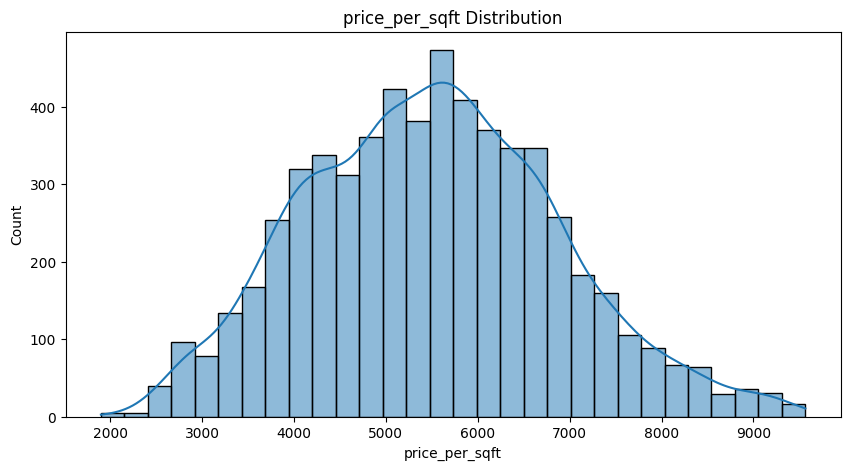

In [33]:
# Select only the numerical columns
numerical_features = data2.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical features
print("Numerical Features:")
print(numerical_features)
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data2[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()



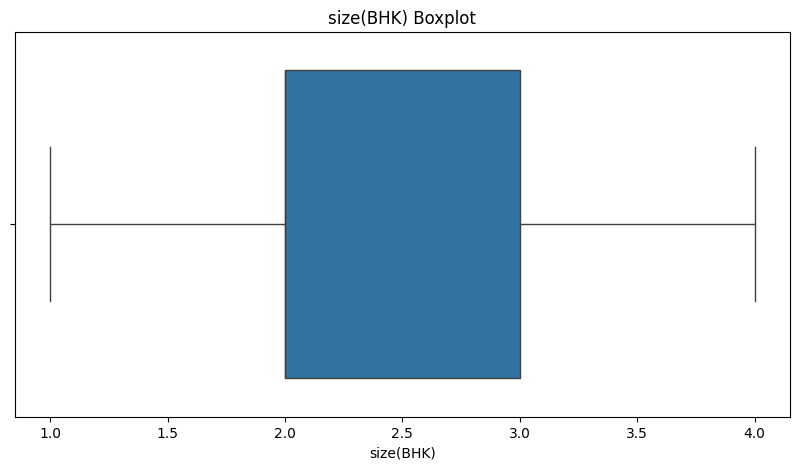

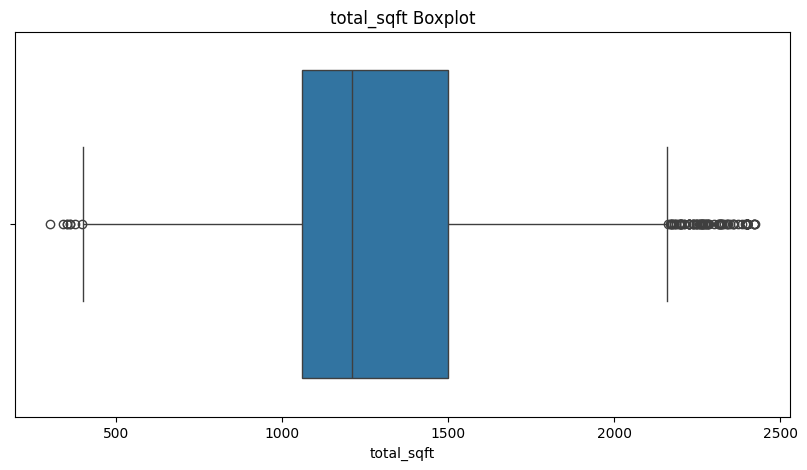

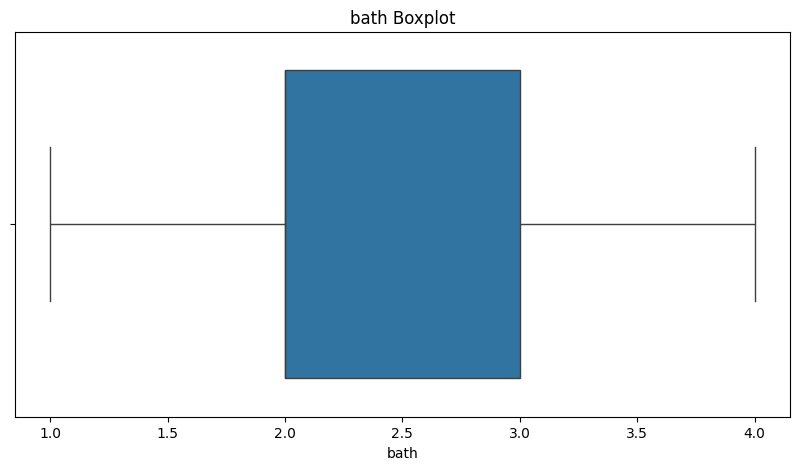

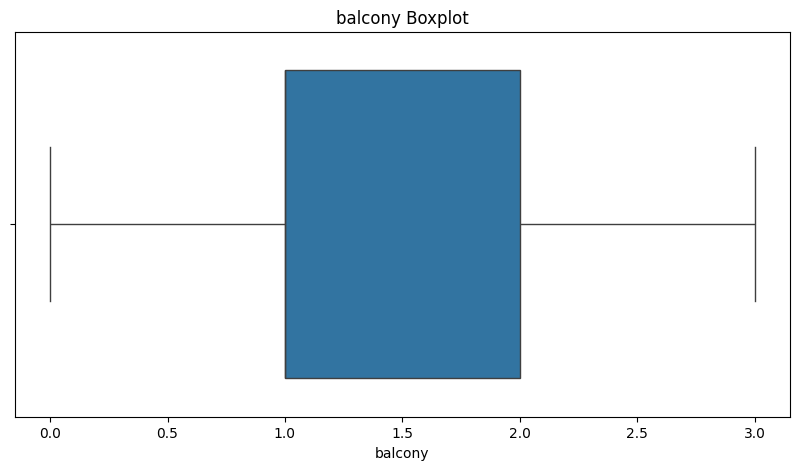

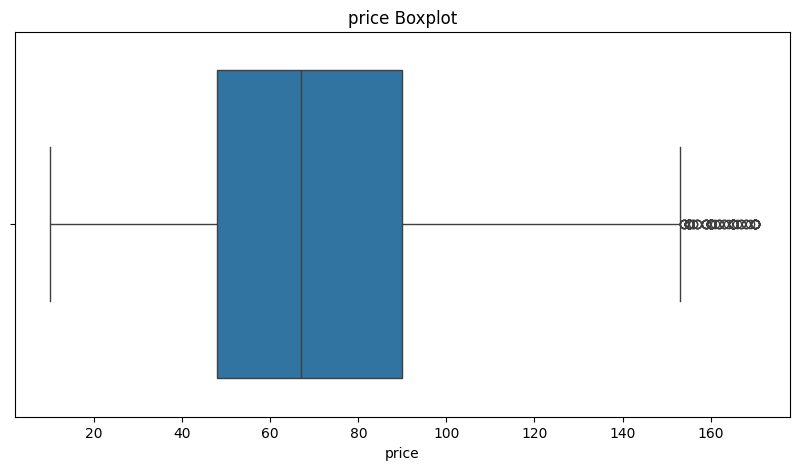

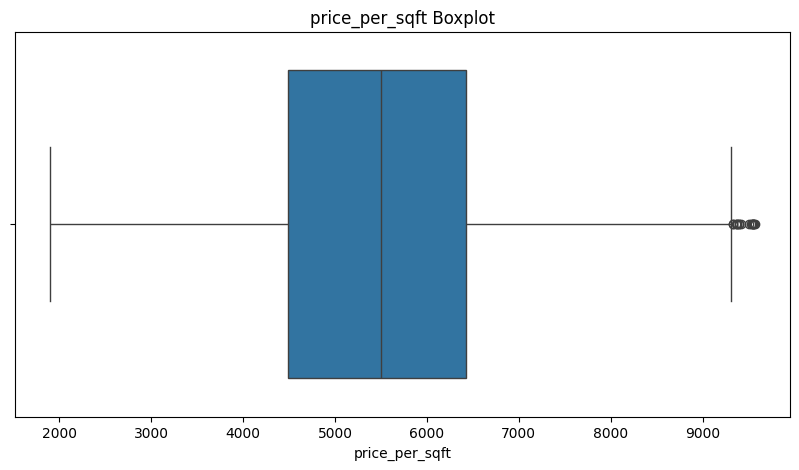

In [34]:
for feature in numerical_features:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=data2[feature])
  plt.title(f'{feature} Boxplot')
  plt.show()

In [35]:
categorical_features = data2.select_dtypes(include=['object', 'category'])
print("categorical_features:",categorical_features.columns)
# Select only numerical columns
numerical_data = data2.select_dtypes(include=['int64', 'float64'])
print("Numerical_Features:\n", numerical_data.columns)



categorical_features: Index(['area_type', 'availability', 'location'], dtype='object')
Numerical_Features:
 Index(['size(BHK)', 'total_sqft', 'bath', 'balcony', 'price',
       'price_per_sqft'],
      dtype='object')


In [36]:
data2.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,1043
Carpet Area,35
Plot Area,317
Super built-up Area,4492


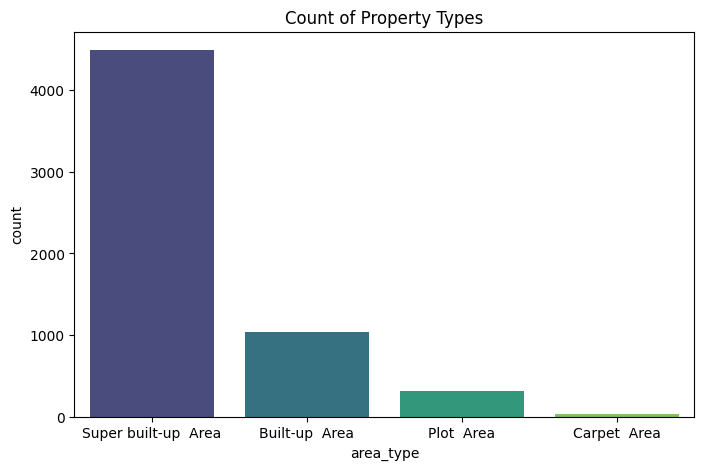

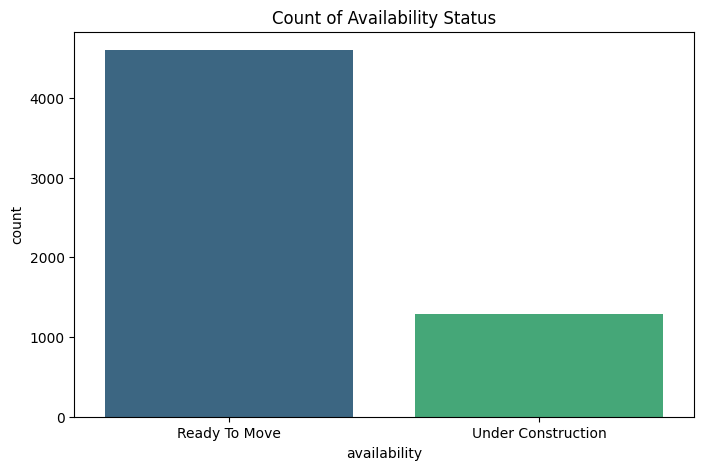

In [37]:

# Count plot for the first feature
plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='area_type', palette='viridis')
plt.title('Count of Property Types')
plt.show()

# Count plot for the second feature
plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='availability', palette='viridis')
plt.title('Count of Availability Status')
plt.show()





**HeatMap**

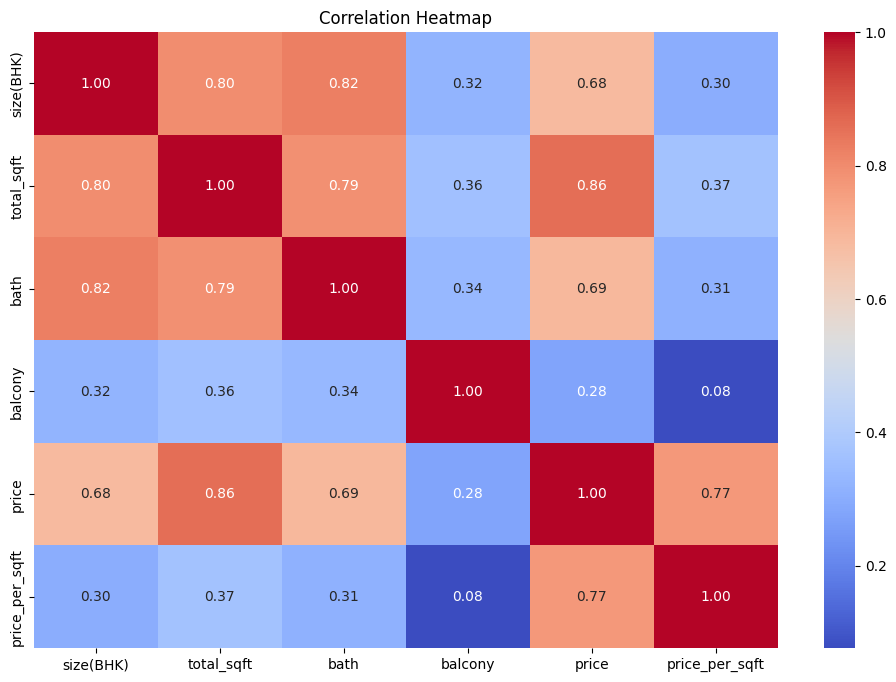

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Main Obesrvation**

Key predictors of price are total_sqft, size(BHK), and bath due to their stronger correlations.

price_per_sqft is largely influenced by price, which makes sense as it’s derived from the total price and area.

balcony may not be very informative as it has weak correlations with other variables, so it might be considered for exclusion or treated as a secondary feature.

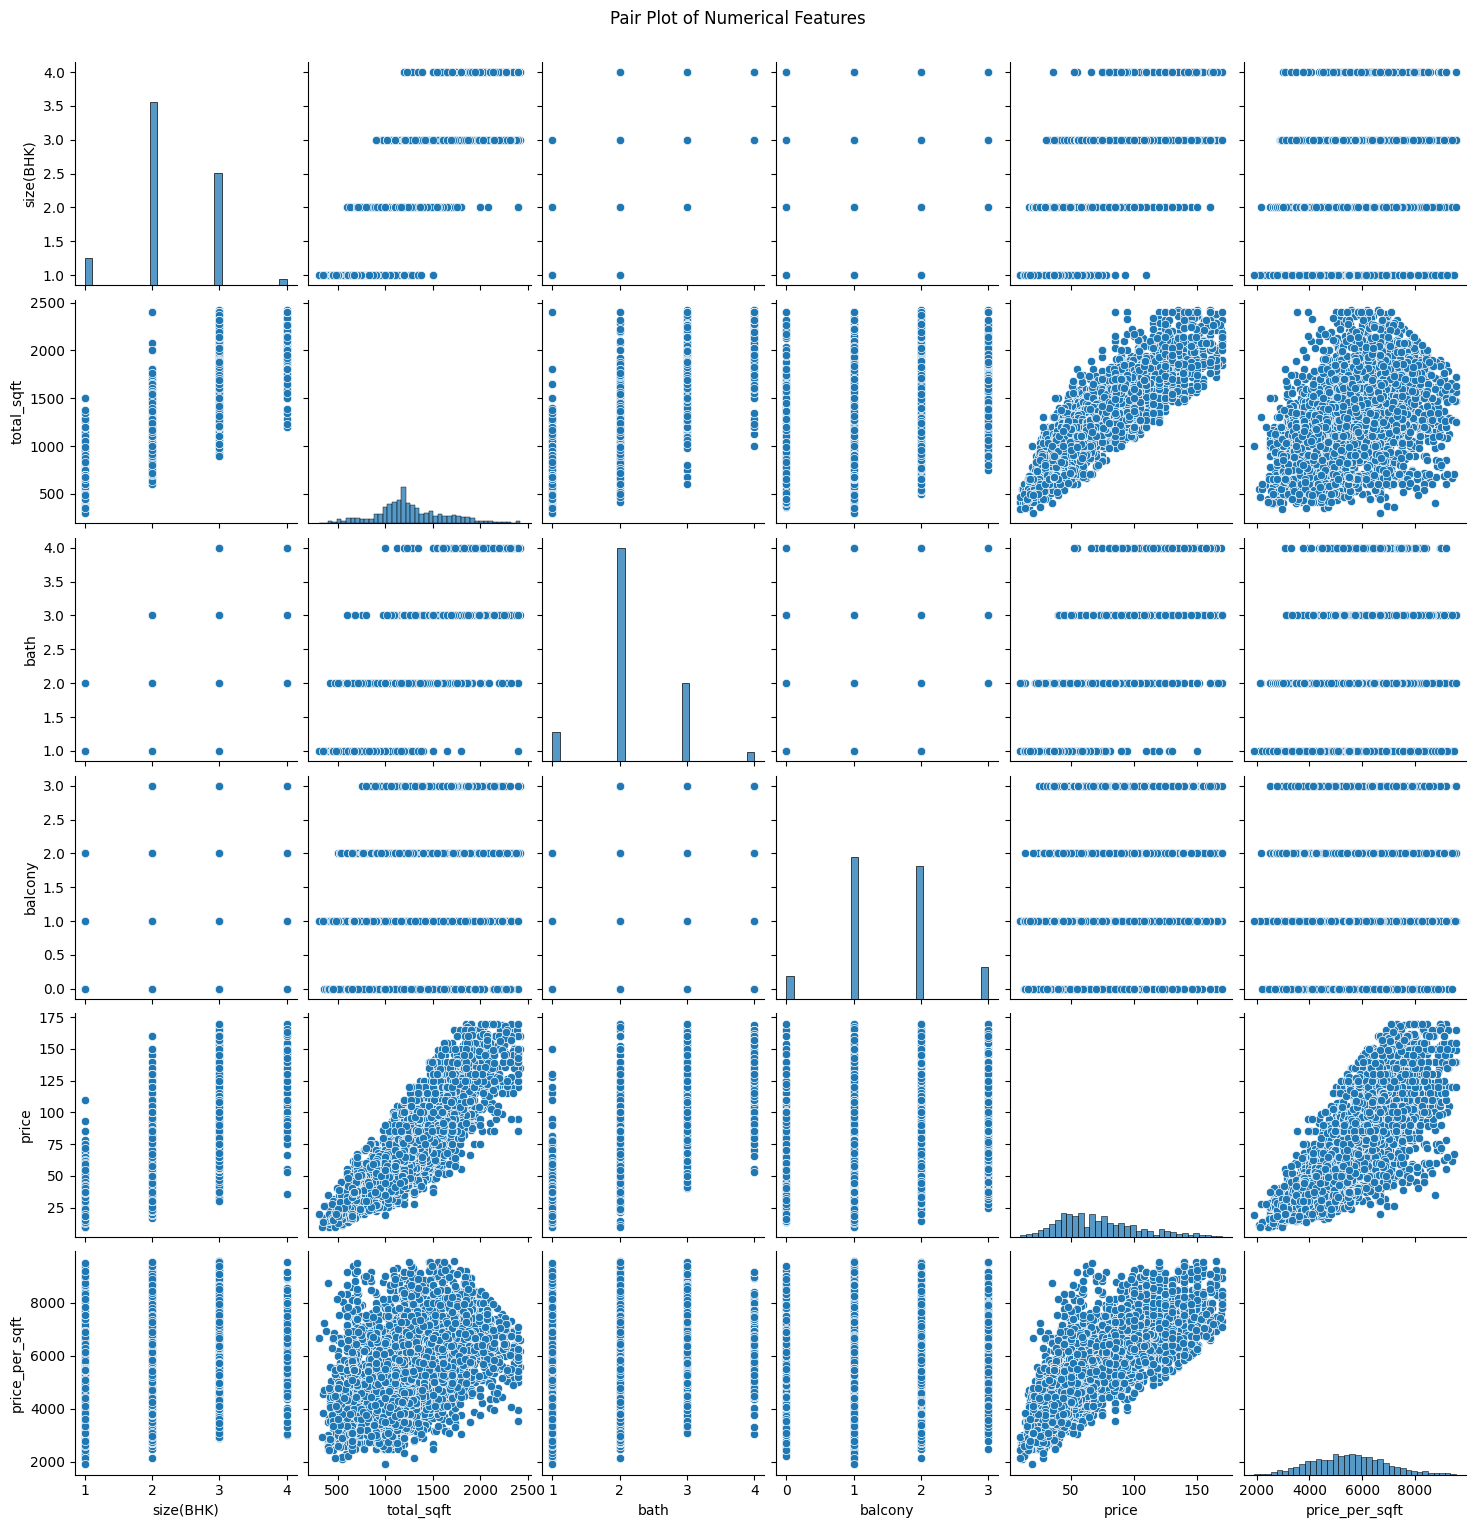

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the pairplot
pair_plot = sns.pairplot(data2)

# Set the title by accessing the Figure object of the pairplot
pair_plot.fig.suptitle('Pair Plot of Numerical Features', y=1.02)  # Adjust the y position for title spacing

# Show the plot
plt.show()


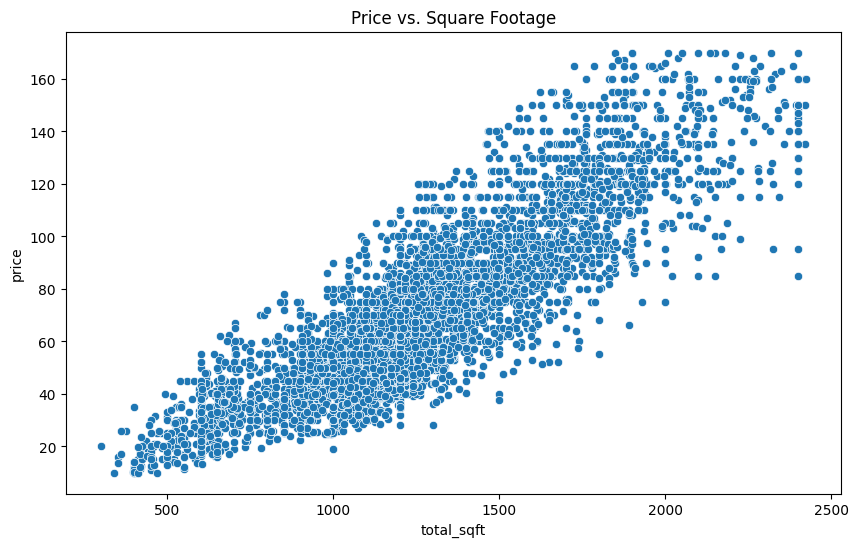

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='total_sqft', y='price')
plt.title('Price vs. Square Footage')
plt.show()

obsevation:

linear grouth

as the total sqft inceraes price also increaes

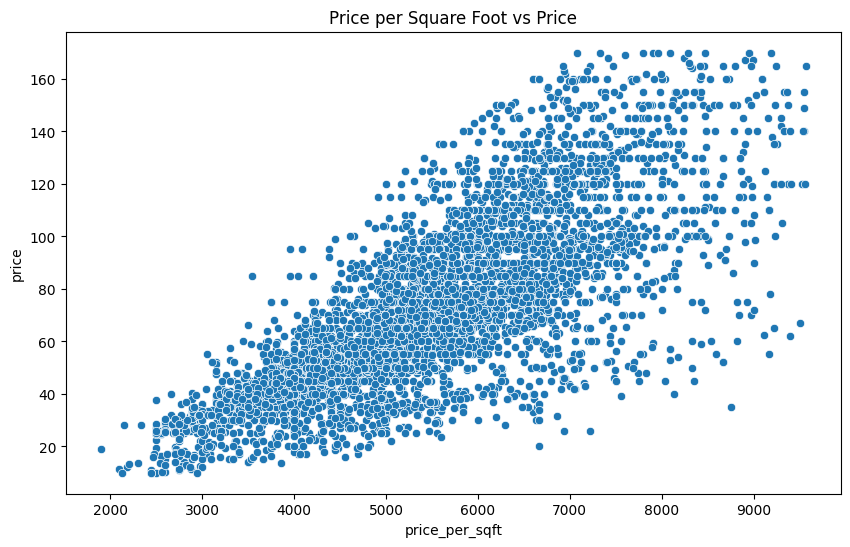

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='price_per_sqft', y='price', palette='viridis')
plt.title('Price per Square Foot vs Price')
plt.show()


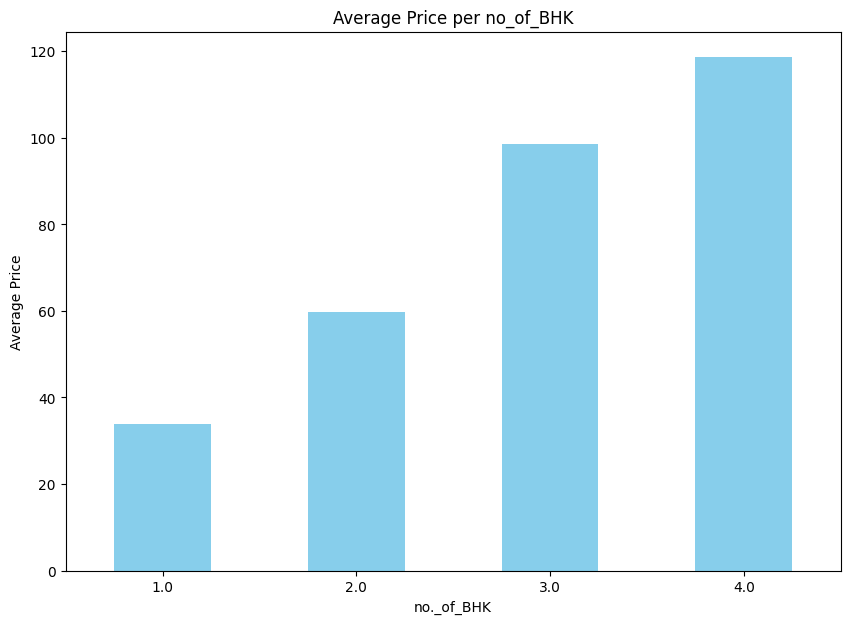

In [42]:
avg_price_per_size = data2.groupby('size(BHK)')['price'].mean()
plt.figure(figsize=(10, 7))
avg_price_per_size.plot(kind='bar', color='skyblue')
plt.title('Average Price per no_of_BHK')
plt.xlabel('no._of_BHK')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


**As number of room increase price also increases.**


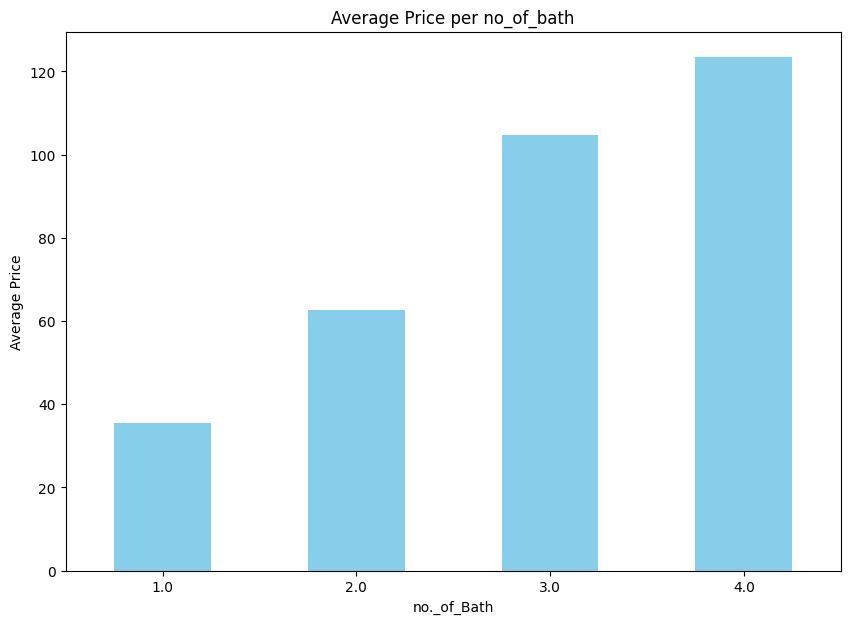

In [43]:

avg_price_per_bath = data2.groupby('bath')['price'].mean()


plt.figure(figsize=(10, 7))
avg_price_per_bath.plot(kind='bar', color='skyblue')
plt.title('Average Price per no_of_bath')
plt.xlabel('no._of_Bath')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


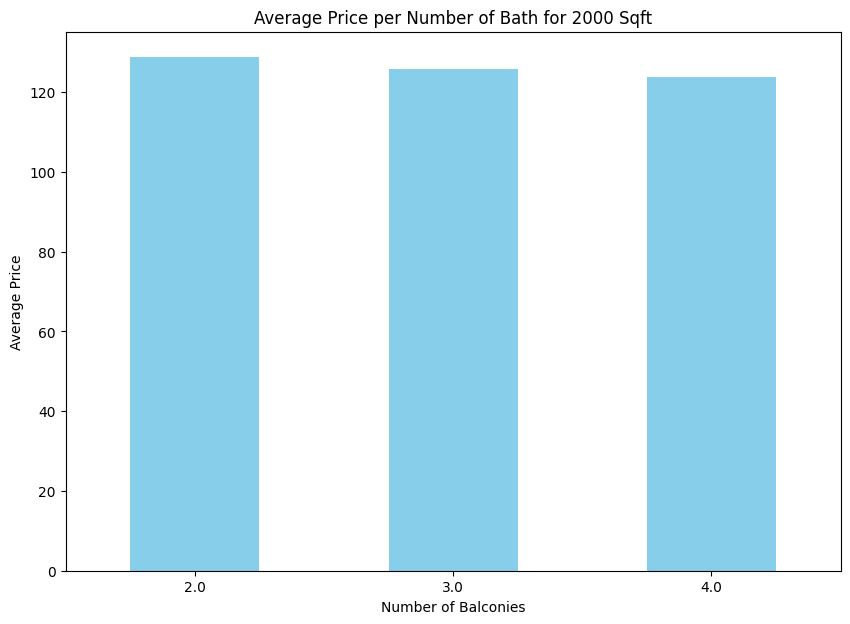

In [44]:

specific_sqft = 2000
filtered_data = data2[data2['total_sqft'] == specific_sqft]
avg_price_per_balcony = filtered_data.groupby('bath')['price'].mean()
plt.figure(figsize=(10, 7))
avg_price_per_balcony.plot(kind='bar', color='skyblue')
plt.title(f'Average Price per Number of Bath for {specific_sqft} Sqft')
plt.xlabel('Number of Balconies')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


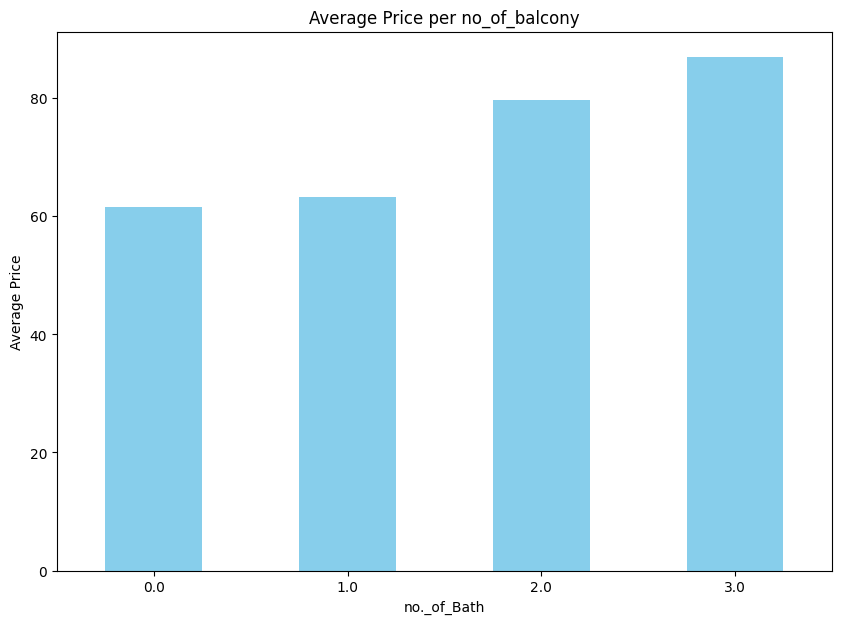

In [45]:

avg_price_per_bath = data2.groupby('balcony')['price'].mean()


plt.figure(figsize=(10, 7))
avg_price_per_bath.plot(kind='bar', color='skyblue')
plt.title('Average Price per no_of_balcony')
plt.xlabel('no._of_Bath')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


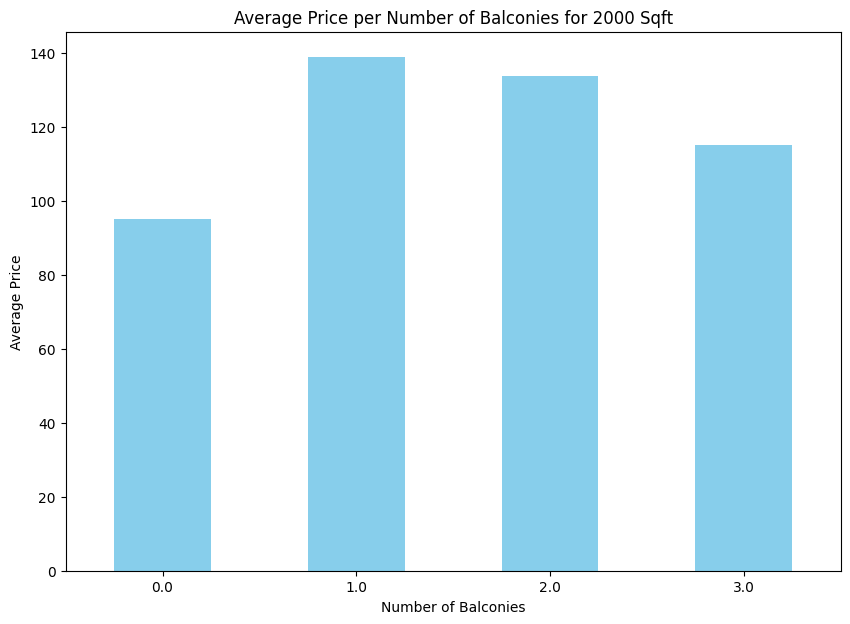

In [46]:
# Define the specific square footage area you want to check
specific_sqft = 2000  # Replace with the desired square footage

# Filter the data to include only entries with the specified total_sqft
filtered_data = data2[data2['total_sqft'] == specific_sqft]

# Calculate the average price per number of balconies for the specified square footage
avg_price_per_balcony = filtered_data.groupby('balcony')['price'].mean()

# Plotting
plt.figure(figsize=(10, 7))
avg_price_per_balcony.plot(kind='bar', color='skyblue')
plt.title(f'Average Price per Number of Balconies for {specific_sqft} Sqft')
plt.xlabel('Number of Balconies')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


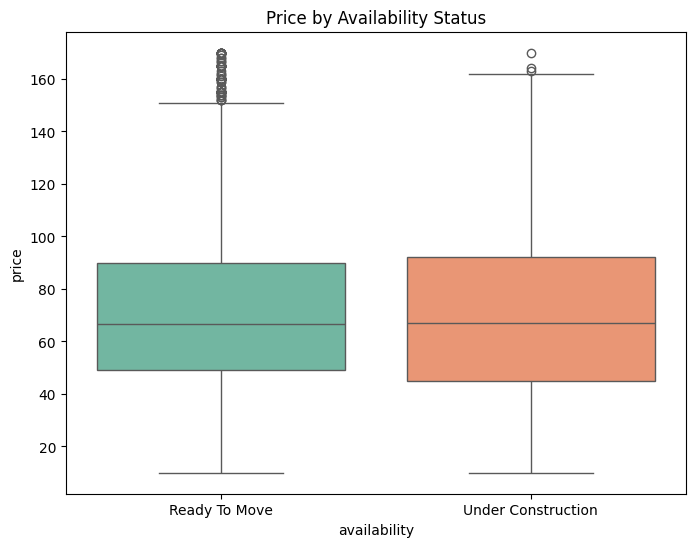

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2, x='availability', y='price', palette='Set2')
plt.title('Price by Availability Status')
plt.show()


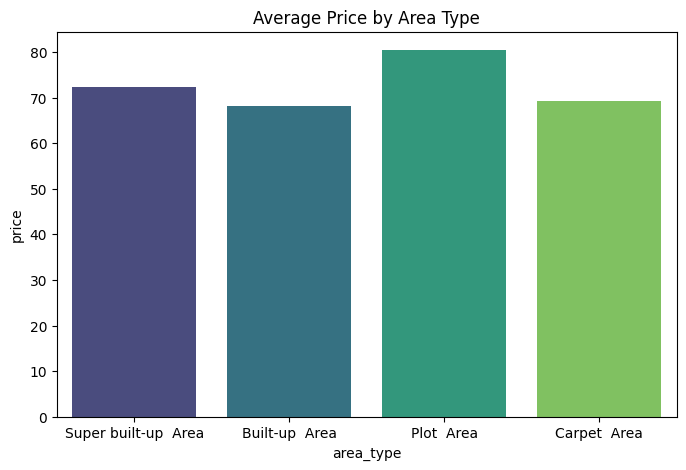

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data2, x='area_type', y='price', estimator='mean', ci=None, palette='viridis')
plt.title('Average Price by Area Type')
plt.show()



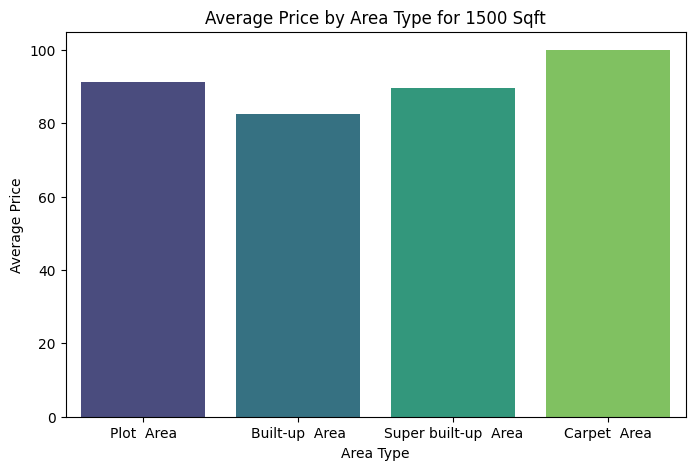

In [50]:

specific_sqft = 1500


filtered_data = data2[data2['total_sqft'] == specific_sqft]


plt.figure(figsize=(8, 5))
sns.barplot(data=filtered_data, x='area_type', y='price', estimator='mean', ci=None, palette='viridis')
plt.title(f'Average Price by Area Type for {specific_sqft} Sqft')
plt.xlabel('Area Type')
plt.ylabel('Average Price')
plt.show()


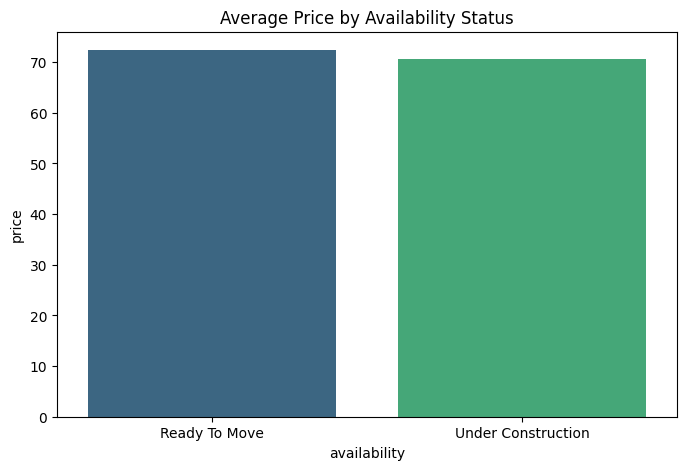

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data2, x='availability', y='price', estimator='mean', ci=None, palette='viridis')
plt.title('Average Price by Availability Status')
plt.show()


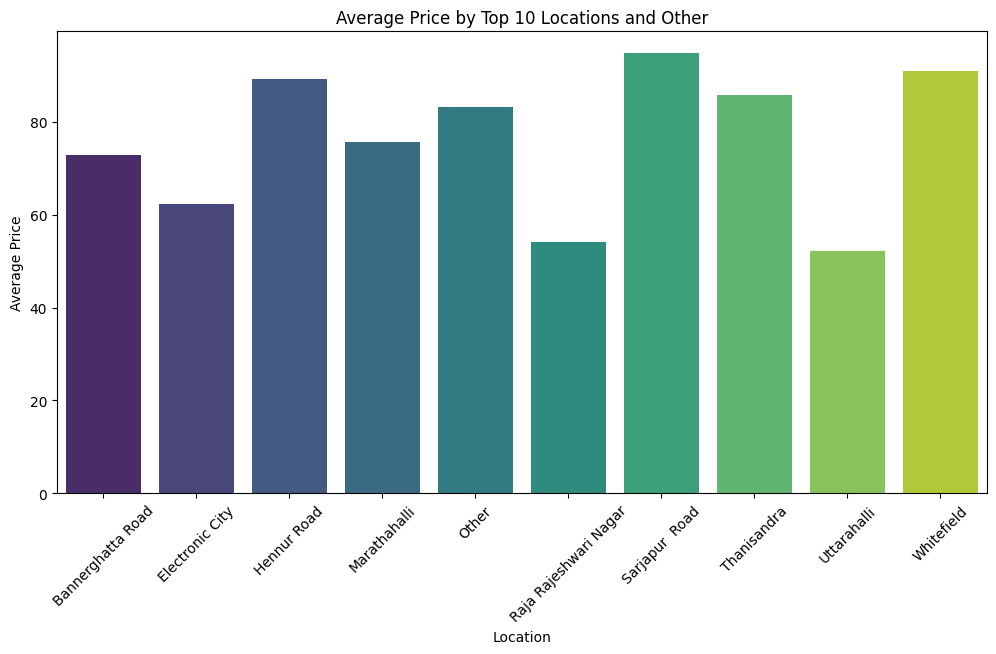

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_locations = data2['location'].value_counts().nlargest(10).index


data2['location_group'] = data2['location'].where(data2['location'].isin(top_locations))


plt.figure(figsize=(12, 6))
sns.barplot(data=data2, x='location_group', y='price', estimator='mean', ci=None, palette='viridis')
plt.title('Average Price by Top 10 Locations and Other')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Location')
plt.show()


In [54]:
category_to_check = 'ther'

if category_to_check in data2['location'].values:
    print(f"{category_to_check} is present in the 'location' feature.")
else:
    print(f"{category_to_check} is not present in the 'location' feature.")

ther is not present in the 'location' feature.


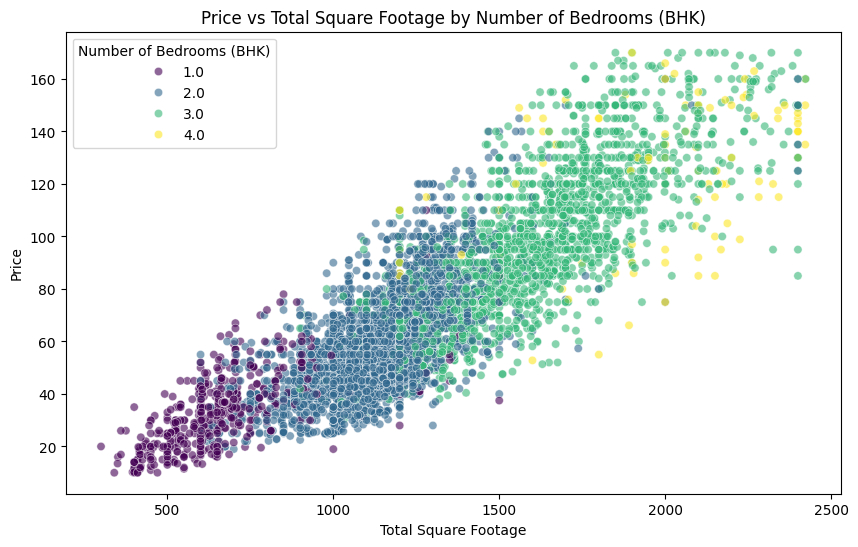

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='total_sqft', y='price', hue='size(BHK)', palette='viridis', alpha=0.6)
plt.title('Price vs Total Square Footage by Number of Bedrooms (BHK)')
plt.xlabel('Total Square Footage')
plt.ylabel('Price')
plt.legend(title='Number of Bedrooms (BHK)')
plt.show()


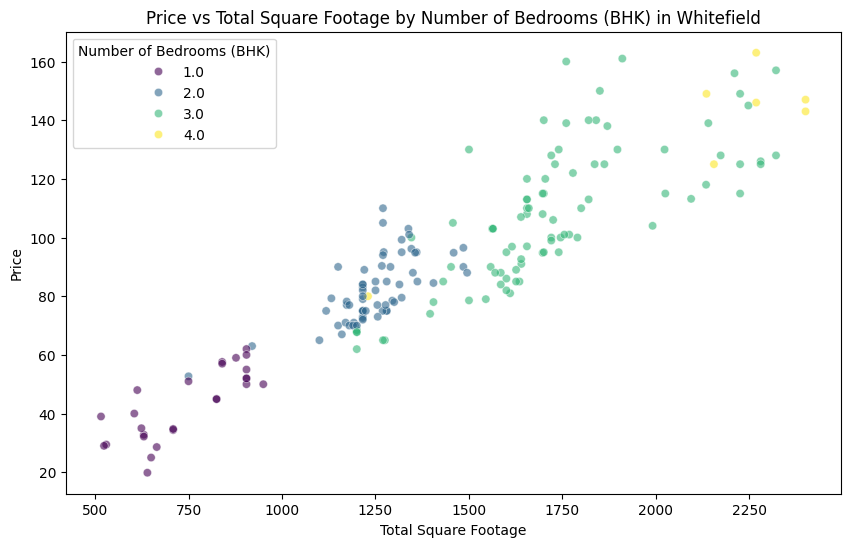

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_by_location(data, location):

    location_data = data2[data2.location == location]


    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=location_data, x='total_sqft', y='price', hue='size(BHK)', palette='viridis', alpha=0.6)

    plt.title(f'Price vs Total Square Footage by Number of Bedrooms (BHK) in {location}')
    plt.xlabel('Total Square Footage')
    plt.ylabel('Price')
    plt.legend(title='Number of Bedrooms (BHK)')
    plt.show()
plot_scatter_by_location(data2, "Whitefield")


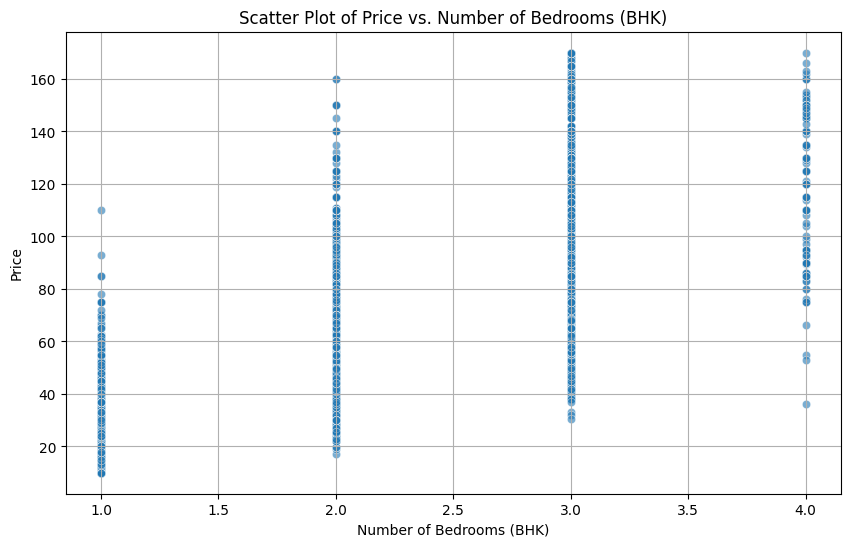

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='size(BHK)', y='price', alpha=0.6)
plt.title('Scatter Plot of Price vs. Number of Bedrooms (BHK)')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


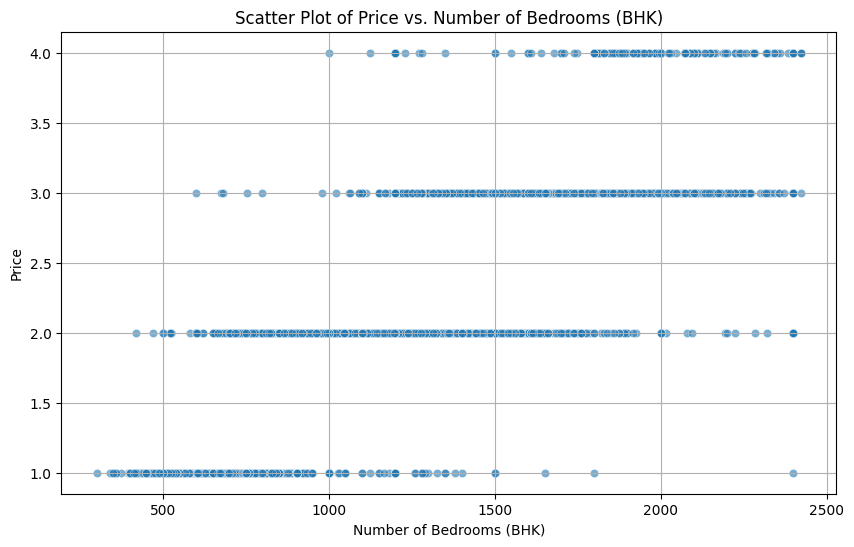

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='total_sqft', y='bath', alpha=0.6)
plt.title('Scatter Plot of Price vs. Number of Bedrooms (BHK)')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [61]:
print(len(data2['area_type'].unique()))

4


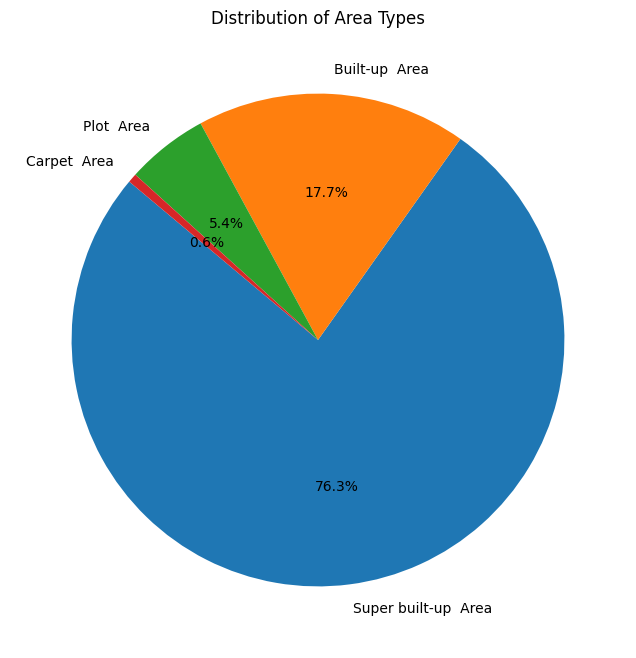

In [62]:
# Count occurrences of each area type
area_type_counts = data2['area_type'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area Types')
plt.show()



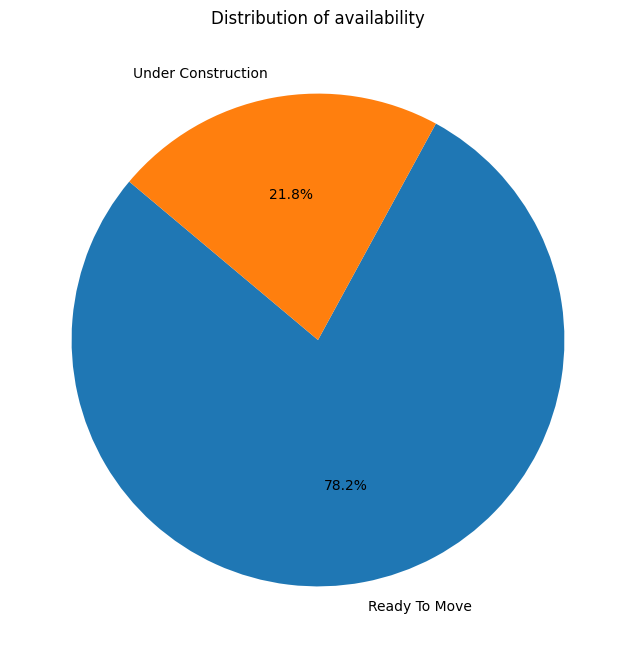

In [63]:
# Count occurrences of each area type
area_type_counts = data2['availability'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of availability')
plt.show()

